In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# (1) Minimum Wage Data (mini_wage_df)

* https://www.kaggle.com/lislejoem/us-minimum-wage-by-state-from-1968-to-2017
* https://www.dol.gov/agencies/whd/state/minimum-wage/history

In [2]:
mini_wage_path = "mini_wage_data.csv"
mini_wage_df = pd.read_csv(mini_wage_path,encoding='iso-8859-1')
mini_wage_df = mini_wage_df.reset_index(drop=True)
# min_wage_df

In [3]:
mini_wage_df[mini_wage_df['State']=='Alabama'].head()

,ï»¿,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
55,55,1969,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
110,110,1970,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
165,165,1971,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
220,220,1972,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


# (2) LABOR FORCE (labor_force_df)
## Combining State by State Labor Force Data
* Year [1976-2020]
* Period [Jan - Dec]
* labor force participation rate
* employment-population ratio
* labor force	employment
* unemployment	
* unemployment rate

* references : https://www.bls.gov/lau/


The values in the dataset are as follows:
* Year: The year of the data.
* State: The state or territory of the data.
* Table_Data: The scraped value from the source.
* Footnote: The footnote associated with the Table_Data. See more below in the dataset description. You can alternatively find them at the bottom of the US Department of Labor's page.
* High.Value: As there were some values in Table_Data that had multiple values (usually associated with footnotes), this is the higher of the two values in the table. It could be useful for viewing the proposed minimum wage, because in most cases, the higher value meant that all persons protected under minimum wage laws eventually had minimum wage set at that value.
* Low.Value: This is the same as High.Value, but has the lower of the two values. This could be useful for viewing the effective minimum wage at the year of setting the minimum wage, as peoples protected under such minimum wage laws made that value during that year (although, in most cases, they had a higher minimum wage after that year).
* CPI.Average: This is the Consumer Price Index associated with that year. It was used to calculate 2018-equivalent values.
* High.2018: This is the 2018-equivalent dollars for High.Value.
* Low.2018: This is the 2018-equivalent dollars for Low.Value.

#### Generate DataFrame

In [4]:
# Generate Each CSV file into saperate DataFrames
state_name = pd.read_csv("STATEWISE DATA LABOR FORCE/state_name.csv")
state_name = state_name[['States', 'st']]

In [5]:
# list of state
states_list = list(state_name.States)
st_list= list(state_name.st)

In [6]:
# read csv data of each state and create DataFrame
# Add columns State and St
for state, st in zip(states_list,st_list):
    #print (state, st)
    exec(f"df_{st} = pd.read_csv('STATEWISE DATA LABOR FORCE/{state}.csv')")
    exec(f"df_{st}['states'] = '{state}' ")
    exec(f"df_{st}['st'] = '{st}' ")
    # change all column name to lower case
    exec(f"df_{st}.columns = map(str.lower, df_{st}.columns)")

#### Combine DataFrame

In [7]:
com_labor_df = pd.DataFrame()
for st in st_list:
    com_labor_df = pd.concat([com_labor_df, eval(f"df_{st}")])

In [8]:
com_labor_df.head(55)

,year,period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,states,st
0,1976,Jan,57.3,53.4,1492409,1392154,100255,6.7,Alabama,al
1,1976,Feb,57.2,53.3,1491820,1391975,99845,6.7,Alabama,al
2,1976,Mar,57.0,53.2,1490600,1392137,98463,6.6,Alabama,al
3,1976,Apr,56.9,53.2,1489947,1393177,96770,6.5,Alabama,al
4,1976,May,56.8,53.1,1490609,1394591,96018,6.4,Alabama,al
5,1976,Jun,56.8,53.1,1493270,1396510,96760,6.5,Alabama,al
6,1976,Jul,56.8,53.1,1497488,1398508,98980,6.6,Alabama,al
7,1976,Aug,56.9,53,1502397,1400824,101573,6.8,Alabama,al
8,1976,Sep,57.0,53.1,1507195,1403488,103707,6.9,Alabama,al
9,1976,Oct,57.1,53.1,1512273,1406391,105882,7,Alabama,al


In [9]:
# copy dataFrame
com_labor_df1 = com_labor_df.copy()

In [10]:
com_labor_df1['employment-population ratio']=com_labor_df1['employment-population ratio'].replace('54.4(P)',54.4)
com_labor_df1['labor force'] = com_labor_df1['labor force'].replace('1079960(V)', 1079960)
com_labor_df1['labor force'] = com_labor_df1['labor force'].replace('-(N)', 'nan')
com_labor_df1['employment'] = com_labor_df1['employment'].replace('964344(V)',964344)
com_labor_df1['employment'] = com_labor_df1['employment'].replace('-(N)', 'nan')
com_labor_df1['unemployment'] = com_labor_df1['unemployment'].replace('115616(V)',115616)
com_labor_df1['unemployment'] = com_labor_df1['unemployment'].replace('-(N)', 'nan')
com_labor_df1['unemployment rate'] = com_labor_df1['unemployment rate'].replace('10.7(V)',10.7)
com_labor_df1['unemployment rate'] = com_labor_df1['unemployment rate'].replace('-(N)', 'nan')

In [11]:
com_labor_df1.head()

,year,period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,states,st
0,1976,Jan,57.3,53.4,1492409,1392154,100255,6.7,Alabama,al
1,1976,Feb,57.2,53.3,1491820,1391975,99845,6.7,Alabama,al
2,1976,Mar,57.0,53.2,1490600,1392137,98463,6.6,Alabama,al
3,1976,Apr,56.9,53.2,1489947,1393177,96770,6.5,Alabama,al
4,1976,May,56.8,53.1,1490609,1394591,96018,6.4,Alabama,al


In [12]:
# conver colum to float
# com_labor_df1 = com_labor_df.copy()
com_labor_df1['year'] = com_labor_df1['year'].astype(int)
com_labor_df1['labor force participation rate'] = com_labor_df1['labor force participation rate'].astype(float)
# com_labor_df1['employment-population ratio'] = com_labor_df1['employment-population ratio'].astype(float)
com_labor_df1['employment-population ratio'] = pd.to_numeric(com_labor_df1['employment-population ratio'])
com_labor_df1['labor force'] = com_labor_df1['labor force'].astype(float)
com_labor_df1['employment'] = com_labor_df1['employment'].astype(float)
com_labor_df1['unemployment'] = com_labor_df1['unemployment'].astype(float)
com_labor_df1['unemployment rate'] = com_labor_df1['unemployment rate'].astype(float)

In [13]:
com_labor_cl_df = com_labor_df1.groupby(['states','st','year'],as_index=False)

In [14]:
labor_force_df=com_labor_cl_df.mean()
labor_force_df=labor_force_df.reset_index(drop=True)

In [15]:
labor_force_df.head()

,states,st,year,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate
0,Alabama,al,1976,57.033333,53.158333,1.500987e+06,1.399433e+06,101553.750000,6.766667
1,Alabama,al,1977,58.350000,54.058333,1.568600e+06,1.453877e+06,114722.833333,7.316667
2,Alabama,al,1978,59.058333,55.325000,1.621254e+06,1.518556e+06,102697.750000,6.316667
3,Alabama,al,1979,59.341667,55.100000,1.656564e+06,1.537704e+06,118860.333333,7.175000
4,Alabama,al,1980,59.008333,53.766667,1.669343e+06,1.521131e+06,148212.250000,8.883333


# By year by State Data with Hourly Rate and Anual Rate (employment_df)
###### Reference:
* https://www.bls.gov/oes/tables.htm

In [16]:
years = range(1997,2020)
for year in years:
    # Generate Each CSV file into saperate DataFrames
    exec(f"df_{year} = pd.read_csv('ToCombine/{year}.csv')")
    # change columns to lower case
    exec(f"df_{year}.columns = map(str.lower, df_{year}.columns)")
    # rename occ_titl to occ_title
    exec(f"df_{year} = df_{year}.rename(columns={{'occ_titl': 'occ_title'}})")
    exec(f"df_{year} = df_{year}.rename(columns={{'year ': 'year'}})")
    exec(f"df_{year} = df_{year}.rename(columns={{'area_title': 'state'}})")  
    #add year column to dataframe
    exec(f"df_{year}['year']={year}")

In [17]:
# column list to select from each DataFrame
col_list = ['area', 'state', 'occ_code', 
            'occ_title', 'tot_emp', 'h_mean', 
            'a_mean', 'h_median','a_median','annual', 'year']

In [18]:
# create new clean DataFrame
for year in years:
    exec(f"df_{year}_clean = df_{year}[{col_list}]")

##### combine DataFrames

In [19]:
combine_df = pd.DataFrame()
for year in years :
    combine_df = pd.concat([combine_df, eval(f"df_{year}_clean")])
combine_df.head()

,area,state,occ_code,occ_title,tot_emp,h_mean,a_mean,h_median,a_median,annual,year
0,1.0,Alabama,10000,Managerial and Administrative Occupations,NaN,NaN,NaN,NaN,NaN,NaN,1997
1,1.0,Alabama,13000,Staff and Administrative Specialty Managerial ...,**,18.04,37530,16.25,33800,NaN,1997
2,1.0,Alabama,13002,Financial Managers,8140,24.23,50400,20.97,43618,NaN,1997
3,1.0,Alabama,13005,"Personnel, Training, and Labor Relations Managers",2760,20.84,43350,19.29,40123,NaN,1997
4,1.0,Alabama,13008,Purchasing Managers,2370,19.07,39660,15.99,33259,NaN,1997


##### Cleanup DataFrames

In [20]:
# drop all in year and tot_emp
combine_df_clean = combine_df.copy()
combine_df_clean = combine_df_clean.dropna(subset=['year', 'tot_emp'])


In [21]:
temp = combine_df_clean.copy()
# Remove undefine Value
temp = temp[temp['tot_emp'] !='**']
temp = temp[temp['tot_emp'] !='*']
temp = temp[temp['h_mean'] !='*']
temp = temp[temp['h_mean'] !='#']
temp = temp[temp['a_mean'] !='*']
temp = temp[temp['a_mean'] !='#']

##### Convert column to float

In [22]:
temp1= temp.copy()

In [23]:
temp1['tot_emp']=temp1['tot_emp'].str.replace(',','')
temp1['h_mean']=temp1['h_mean'].str.replace(',','')
temp1['a_mean']=temp1['a_mean'].str.replace(',','')
# temp1['year']=temp1['year'].str.replace(',','')

In [24]:
temp1['tot_emp']=temp1['tot_emp'].astype(float)
temp1['h_mean']=temp1['h_mean'].astype(float)
temp1['a_mean']=temp1['a_mean'].astype(float)
temp1['year']=temp1['year'].astype(float)

In [25]:
# employment data
employment_df = temp1.reset_index(drop=True)

# Data Virtualization

In [26]:
# copy data from the 3 DataFrames
wage_df = mini_wage_df.copy()
lab_df = labor_force_df.copy()
emp_profile_df = employment_df.copy()

In [27]:
# STATES OF INTEREST
state_interest = ['California','New York','Alabama','Texas','Arizona','Illinois']

In [28]:
wage_df.head()

,ï»¿,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [29]:
lab_df.head()

,states,st,year,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate
0,Alabama,al,1976,57.033333,53.158333,1.500987e+06,1.399433e+06,101553.750000,6.766667
1,Alabama,al,1977,58.350000,54.058333,1.568600e+06,1.453877e+06,114722.833333,7.316667
2,Alabama,al,1978,59.058333,55.325000,1.621254e+06,1.518556e+06,102697.750000,6.316667
3,Alabama,al,1979,59.341667,55.100000,1.656564e+06,1.537704e+06,118860.333333,7.175000
4,Alabama,al,1980,59.008333,53.766667,1.669343e+06,1.521131e+06,148212.250000,8.883333


state_interest = ['California','New York','Alabama','Texas','Arizona','Illinois']

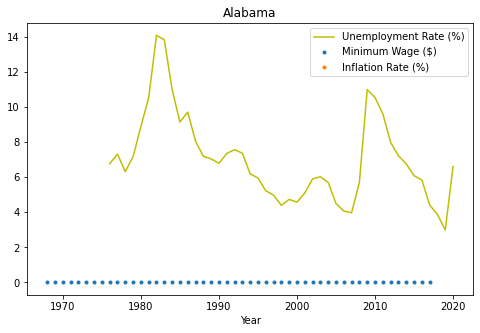

In [30]:
state = state_interest[2]
df1=wage_df[wage_df['State'] == state]
df2=lab_df[lab_df['states'] == state]

fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.scatter(df1['Year'], df1['High.Value'], marker='.', label="Minimum Wage ($)");
ax1.plot(df2['year'], df2['unemployment rate'],color='y', label="Unemployment Rate (%)");
# ax1.scatter(df1['Year'], (df1['CPI.Average']/df1['High.Value'])/4, marker='.');
ax1.scatter(df1['Year'], df1['High.Value']/df1['High.2018'], marker='.', label="Inflation Rate (%)");
ax1.legend();
ax1.set(title=f'{state}',
        xlabel='Year',
       );

#### WAGE BINS

In [31]:
# b = []
# for i in range(len(a)-1):
#     b.append(f'{a[i]}-{a[i+1]}')

In [32]:
# define bin
emp_pro = emp_profile_df.copy()
bin_range = np.arange(round(emp_pro['h_mean'].min()-5,0), round(emp_pro['h_mean'].max()+5,0),10)
bin_name = []
for i in range(len(bin_range)-1):
    bin_name.append(f'{bin_range[i]}-{bin_range[i+1]}')

# bin_name = ['0-5','5-10','10-15','15-20', '20-25','25-30','30-35','35-40',
#             '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75',
#             '75-80', '80-85', '85-90', '90-95', '95-100', '100-105', '105-110',
#             '110-115', '115-120', '120-125', '125-130', '130-135', '135-140',
#            '140-145']

In [33]:
# employment profile
emp_pro['wage_bin'] = pd.cut(emp_pro['h_mean'], bins=bin_range, labels=bin_name)

In [34]:
emp_pro.head()

,area,state,occ_code,occ_title,tot_emp,h_mean,a_mean,h_median,a_median,annual,year,wage_bin
0,1.0,Alabama,13002,Financial Managers,8140.0,24.23,50400.0,20.97,43618,NaN,1997.0,20.0-30.0
1,1.0,Alabama,13005,"Personnel, Training, and Labor Relations Managers",2760.0,20.84,43350.0,19.29,40123,NaN,1997.0,20.0-30.0
2,1.0,Alabama,13008,Purchasing Managers,2370.0,19.07,39660.0,15.99,33259,NaN,1997.0,10.0-20.0
3,1.0,Alabama,13011,"Marketing, Advertising, and Public Relations M...",4500.0,23.76,49420.0,21.52,44762,NaN,1997.0,20.0-30.0
4,1.0,Alabama,13014,Administrative Services Managers,2950.0,20.98,43650.0,19.32,40186,NaN,1997.0,20.0-30.0


In [35]:
temp_emp_pro_bin = emp_pro.copy()
temp_emp_pro_bin = temp_emp_pro_bin.groupby(['state', 'wage_bin', 'year'])

In [36]:
temp_emp_pro_bin.head()

,area,state,occ_code,occ_title,tot_emp,h_mean,a_mean,h_median,a_median,annual,year,wage_bin
0,1.0,Alabama,13002,Financial Managers,8140.0,24.23,50400.0,20.97,43618,NaN,1997.0,20.0-30.0
1,1.0,Alabama,13005,"Personnel, Training, and Labor Relations Managers",2760.0,20.84,43350.0,19.29,40123,NaN,1997.0,20.0-30.0
2,1.0,Alabama,13008,Purchasing Managers,2370.0,19.07,39660.0,15.99,33259,NaN,1997.0,10.0-20.0
3,1.0,Alabama,13011,"Marketing, Advertising, and Public Relations M...",4500.0,23.76,49420.0,21.52,44762,NaN,1997.0,20.0-30.0
4,1.0,Alabama,13014,Administrative Services Managers,2950.0,20.98,43650.0,19.32,40186,NaN,1997.0,20.0-30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
721626,78.0,Virgin Islands,23-1011,Lawyers,200.0,61.47,127860.0,57.69,"120,000",NaN,2019.0,60.0-70.0
721629,78.0,Virgin Islands,25-2011,"Preschool Teachers, Except Special Education",160.0,16.24,33770.0,16.44,"34,180",NaN,2019.0,10.0-20.0
721636,78.0,Virgin Islands,29-1051,Pharmacists,60.0,63.89,132890.0,58.72,"122,130",NaN,2019.0,60.0-70.0
721639,78.0,Virgin Islands,29-1228,"Physicians, All Other; and Ophthalmologists, E...",90.0,66.26,137810.0,47.25,"98,290",NaN,2019.0,60.0-70.0


In [37]:
# taking total employment only
emp_pro_bin = temp_emp_pro_bin['tot_emp'].sum()

##### plotting by wagebin, by state

In [47]:
emp_pro_bin.head()

state    wage_bin  year  
Alabama  0.0-10.0  1997.0    886880.0
                   1998.0    946450.0
                   1999.0    961000.0
                   2000.0    915890.0
                   2001.0    897290.0
Name: tot_emp, dtype: float64

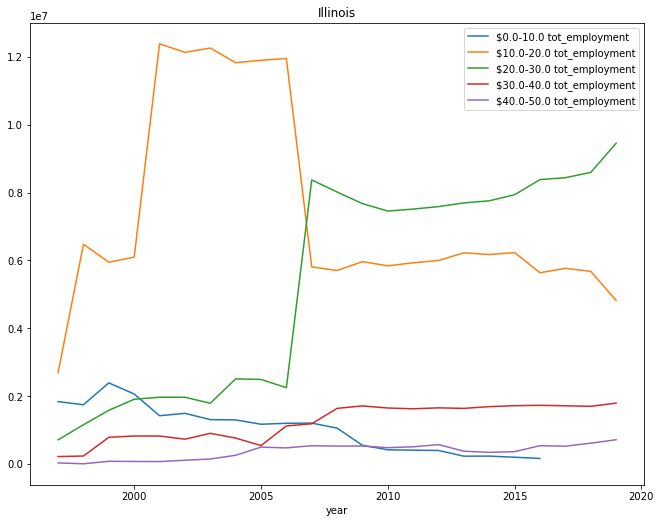

In [57]:
state = state_interest[5]
# temp_bin = bin_name.copy()
temp_bin = [bin_name[i] for i in range(5)]
# temp_bin = ['5-10', '10-15', '15-20', '20-25','25-30','30-35']
# temp_bin = temp_bin[1]
fig2, ax2 = plt.subplots(figsize=(11,8.5))

df1 = wage_df.copy()
df2 = lab_df.copy()

df1 = df1[wage_df['State'] == state]
df2 = lab_df[lab_df['states'] == state]

for bin in temp_bin:
    df3 = emp_pro_bin.copy()
    df3 = df3.loc[(state, bin)]
    df3.plot(ax=ax2, label=f'${bin} tot_employment', title=f'{state}')

# ax2.plot(df1['Year'], df1['High.Value']*1000000, label='Minimum Wage (scale 10^6)')

ax2.legend();